In [1]:
import numpy as np
import utils as Utils
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
trainData = Utils.importData('./data')
testdata = Utils.importTestData('./data')

In [3]:
np.random.shuffle(trainData)

In [4]:
def compute_statistical_features(sequence):
    mean_values = np.mean(sequence, axis=0)
    std_deviation_values = np.std(sequence, axis=0)
    max_values = np.max(sequence, axis=0)
    min_values = np.min(sequence, axis=0)
    range_values = np.ptp(sequence, axis=0) 
    features = np.concatenate([mean_values, std_deviation_values, max_values, min_values, range_values])
    return features

In [5]:
# List to store computed features and corresponding labels
features_list_train = []
labels_list_train = []

In [6]:
for d in trainData:
    """
    compute_statistical_features'
    """
    features = compute_statistical_features(d[0])
    features_list_train.append(features)
    label = d[1]
    labels_list_train.append(label)

In [7]:
# Convert lists to NumPy arrays
X = np.array(features_list_train)
y = np.array(labels_list_train)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=124,shuffle=False)

In [9]:
print(len(X_train))

933


In [10]:
# Define the parameter grid for grid search
param_grid = {'C': [0.01,0.1, 1, 10,100,1000], 'kernel': ['linear', 'rbf', 'poly'], 'degree': [2, 3,4,5,6]}

In [11]:
model = SVC(probability=True)

In [12]:
grid_search = GridSearchCV(model, param_grid, cv=20, scoring='accuracy')

In [19]:
# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_model = grid_search.best_estimator_

# Get the number of support vectors for each class
n_support = best_model.n_support_
print(f'Number of support vectors for each class: {n_support}')
print(f'Total number of support vectors {n_support.sum()}')

Best Parameters: {'C': 1000, 'degree': 2, 'kernel': 'rbf'}
Number of support vectors for each class: [44 43 44 34 46]
Total number of support vectors 211


In [22]:
# Use the best model for predictions
predictions = best_model.predict(X_test)

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9572649572649573


In [24]:
# Generate preds file
#Write a output file
import csv

outputFile = open("final.csv",'w',newline='')
outCSVWriter = csv.writer(outputFile)
outCSVWriter.writerow(["id","action"])


for d in testdata:
    features = compute_statistical_features(d[0])
    features = np.array([features])
    fileId = d[1]
    pred = best_model.predict(features)
    outCSVWriter.writerow([int(fileId),pred[0]])

outputFile.close()

### Evaluation

##### Best Hyperparameters:

<p>C: 1000</p>
<p>Degree: 2<p>
<p>Kernel: 'rbf'</p>

##### Theoretical Complexity:

$$\text{where, $n$ is number of support vectors and $m$ is no of features, where $z$ is no of samples, For the defined algorithm $n$ = 209, $m$ = 100 and $z$ = 933}$$

<p><b>Memory Complexity (Training):</b></p>

$$\text{Memory Complexity for Training : } O(nm)$$

<p><b>Runtime Complexity (Training):</b></p>

$$\text{Runtime Complexity for Training : } O(z^2m) $$

<p><b>Memory Complexity (Testing):</b></p>

$$\text{Memory Complexity for Testing : }  O(nm)$$

<p><b>Runtime Complexity (Testing):</b></p>

$$\text{Runtime Complexity for Testing:} O(nm) $$

<p>The rbf kernel with degree 2 resulted in a moderately sparse model.</p>

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)

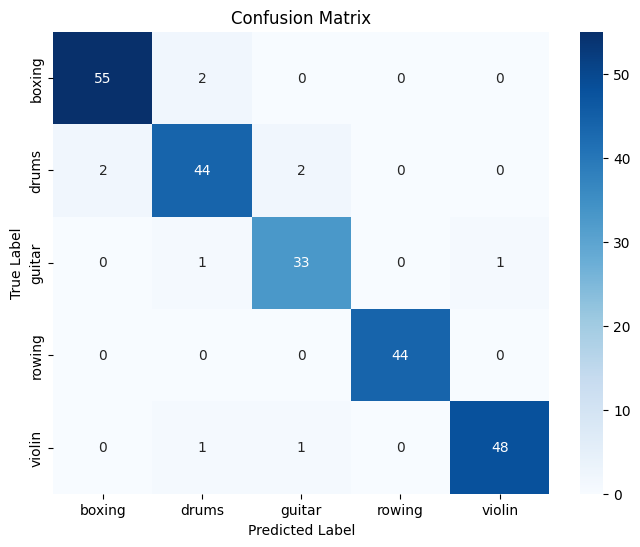

In [25]:
# Display the confusion matrix
target_names = ['boxing','drums','guitar','rowing','violin']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()